# The penguins datasets

In this notebook, we make a quick presentation of the
[Palmer penguins](https://allisonhorst.github.io/palmerpenguins/)
dataset. We use this dataset for both classification and regression
problems by selecting a subset of the features to make our explanations
intuitive.

## Classification dataset

We will use this dataset in classification setting to predict the penguins'
species from anatomical information.

Each penguin is from one of the three following species: Adelie, Gentoo, and
Chinstrap. See the illustration below depicting the three different penguin
species:

![Image of penguins](https://github.com/allisonhorst/palmerpenguins/blob/main/man/figures/lter_penguins.png?raw=true)

This problem is a classification problem since the target is categorical.
We will limit our input data to a subset of the original features
to simplify our explanations when presenting the decision tree algorithm.
Indeed, we will use features based on penguins' culmen measurement. You can
learn more about the penguins' culmen with the illustration below:

![Image of culmen](https://github.com/allisonhorst/palmerpenguins/blob/main/man/figures/culmen_depth.png?raw=true)

We will start by loading this subset of the dataset.

In [ ]:
%%bash
pip install --no-cache-dir -qU pip wheel
pip install --no-cache-dir -qU numpy pandas matplotlib seaborn scikit-learn
pip check

In [1]:
import os
import numpy as np
np.random.seed(42)
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')
sns.set(font='DejaVu Sans')

In [2]:
os.makedirs("./datasets", exist_ok=True)

In [3]:
%%bash

wget -qO "./datasets/penguins_classification.csv" "https://github.com/INRIA/scikit-learn-mooc/raw/main/datasets/penguins_classification.csv"

In [6]:
penguins = pd.read_csv("./datasets/penguins_classification.csv")

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

Let's check the dataset more into details.

In [7]:
penguins.head()

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie


Since that we have few samples, we can check a scatter plot to observe the
samples distribution.

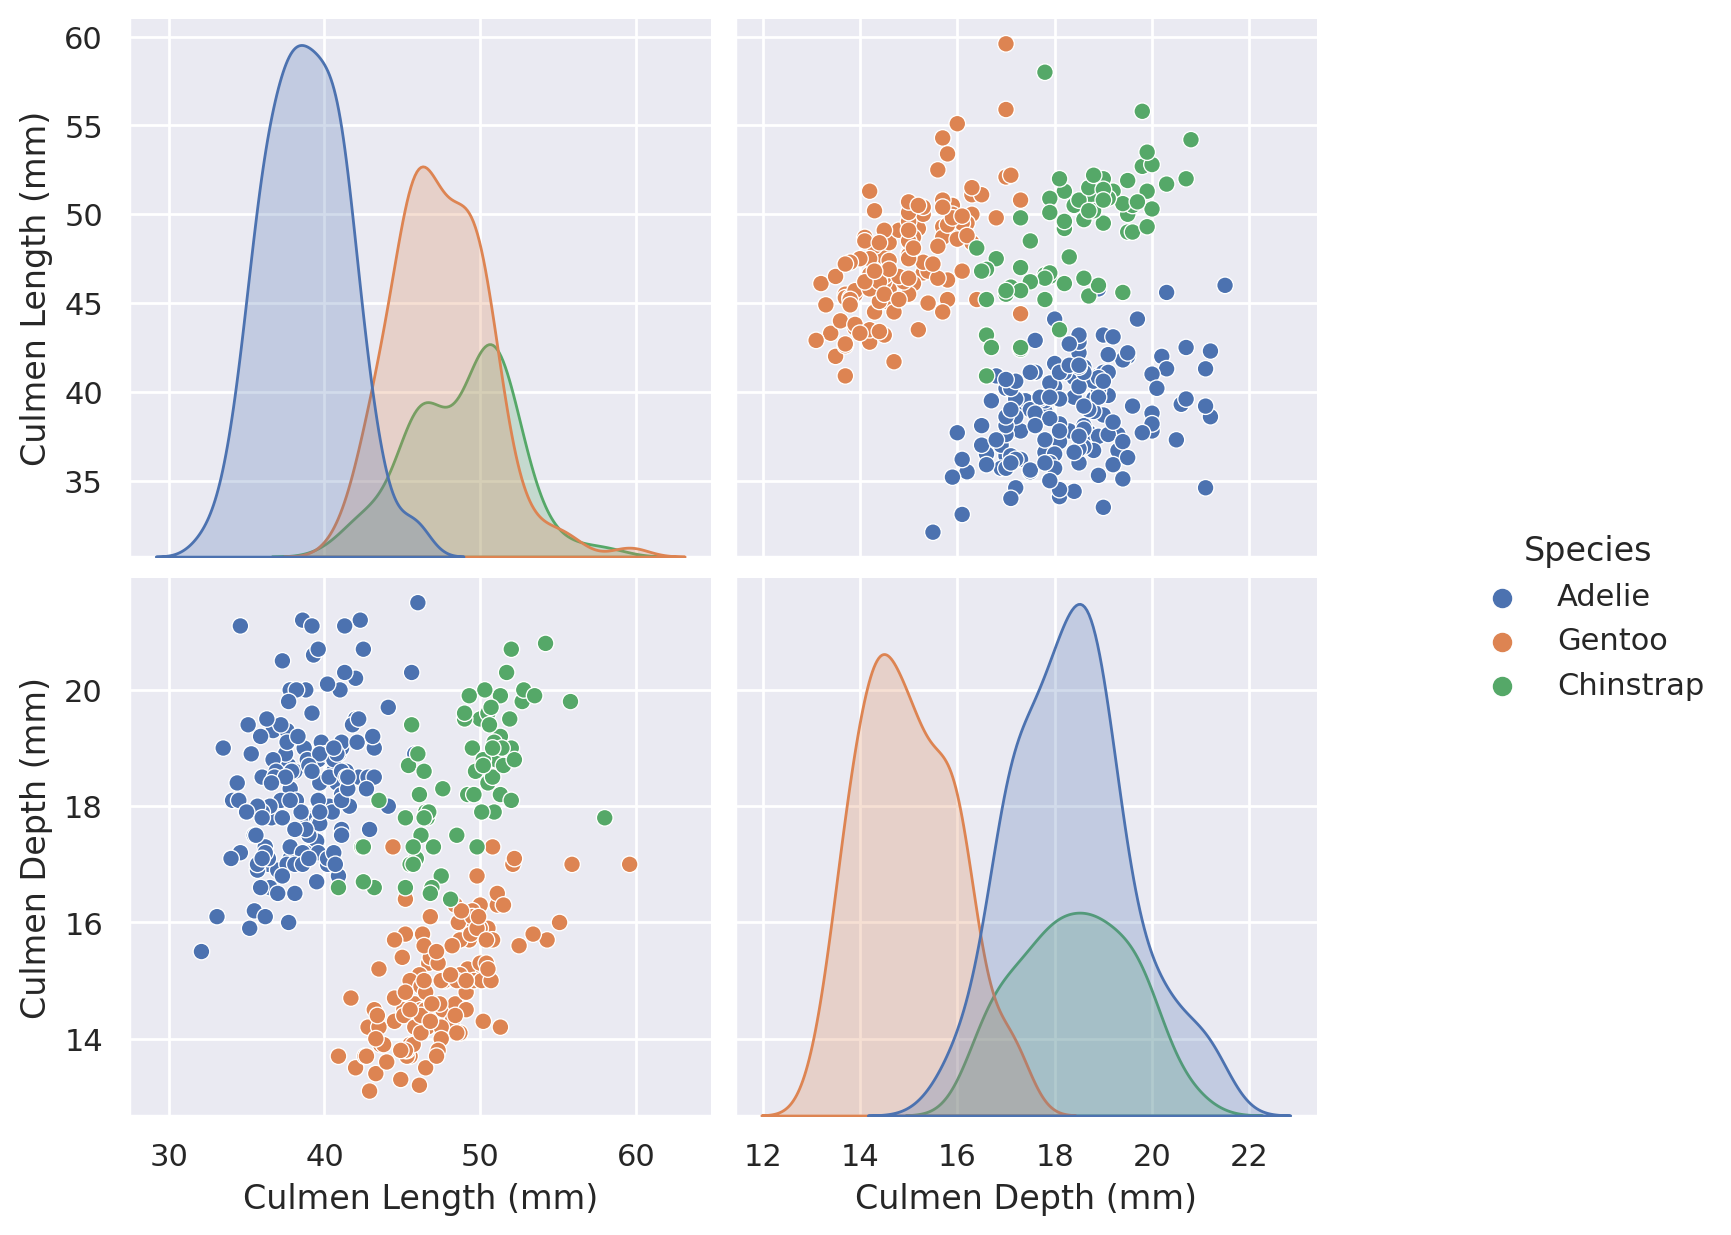

In [8]:
pairplot_figure = sns.pairplot(penguins, hue="Species")
pairplot_figure.fig.set_size_inches(9, 6.5)

First let's check the feature distributions by looking at the diagonal plots
of the pairplot. We can deduce the following intuitions:

* The Adelie species can be differentiated from the Gentoo and Chinstrap
  species depending on the culmen length;
* The Gentoo species can be differentiated from the Adelie and Chinstrap
  species depending on the culmen depth.

## Regression dataset

In a regression setting, the target is a continuous variable instead of
categories. Here, we use two features of the dataset to make such a problem:
the flipper length will be used as data and the body mass will be the target.
In short, we want to predict the body mass using the flipper length.

We will load the dataset and visualize the relationship between the flipper
length and the body mass of penguins.

In [9]:
%%bash

wget -qO "./datasets/penguins_regression.csv" "https://github.com/INRIA/scikit-learn-mooc/raw/main/datasets/penguins_regression.csv"

In [10]:
penguins = pd.read_csv("./datasets/penguins_regression.csv")

data_columns = ["Flipper Length (mm)"]
target_column = "Body Mass (g)"

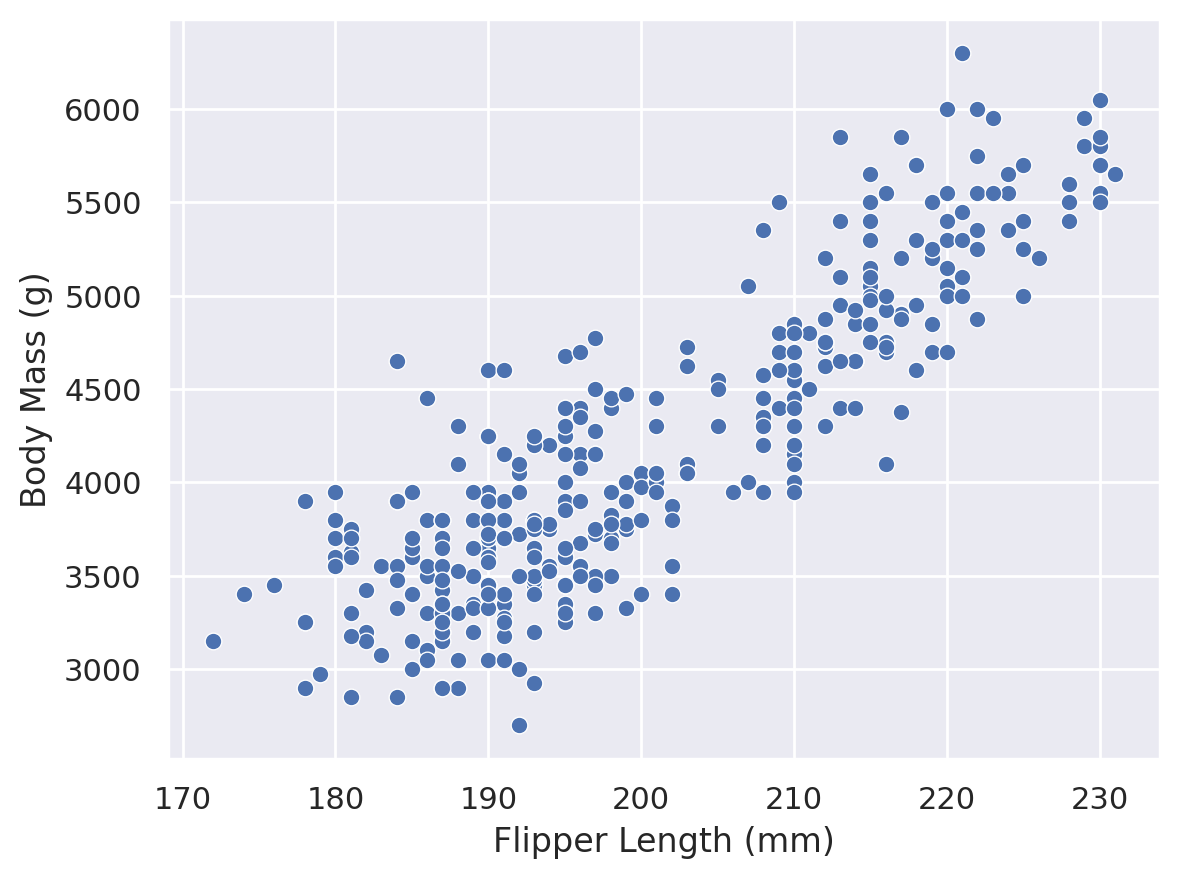

In [11]:
_ = sns.scatterplot(data=penguins, x=data_columns[0], y=target_column)

Here, we deal with a regression problem because our target is a continuous
variable ranging from 2.7 kg to 6.3 kg. From the scatter plot above, we
observe that we have a linear relationship between the flipper length
and the body mass. The longer the flipper of a penguin, the heavier the
penguin.